<a href="https://colab.research.google.com/github/NamNT36/Artifical-Intelligence/blob/main/AI_17_03_EX(dataframe)_data_crab_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
### BAI 3
# Load library
import pandas as pd 
import numpy as np

# Create URL 
url = 'data_crab.csv'

# Load data
data = pd.read_csv(url)

data.head()

correlation = data.corr()
print(correlation)

          index        FL        RW        CL        CW        BD
index  1.000000  0.862876  0.840040  0.911436  0.928248  0.864459
FL     0.862876  1.000000  0.906988  0.978842  0.964956  0.987627
RW     0.840040  0.906988  1.000000  0.892743  0.900402  0.889205
CL     0.911436  0.978842  0.892743  1.000000  0.995023  0.983204
CW     0.928248  0.964956  0.900402  0.995023  1.000000  0.967812
BD     0.864459  0.987627  0.889205  0.983204  0.967812  1.000000


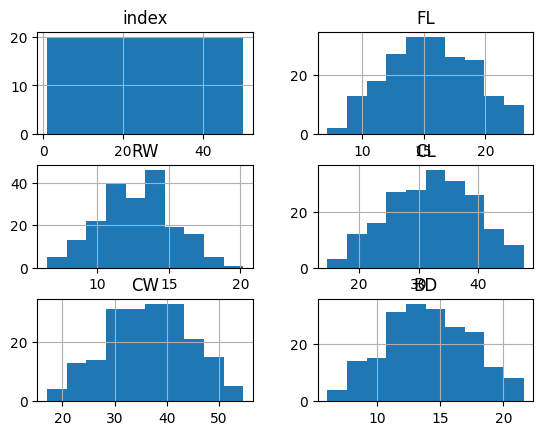

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt 

data.hist()
plt.show()

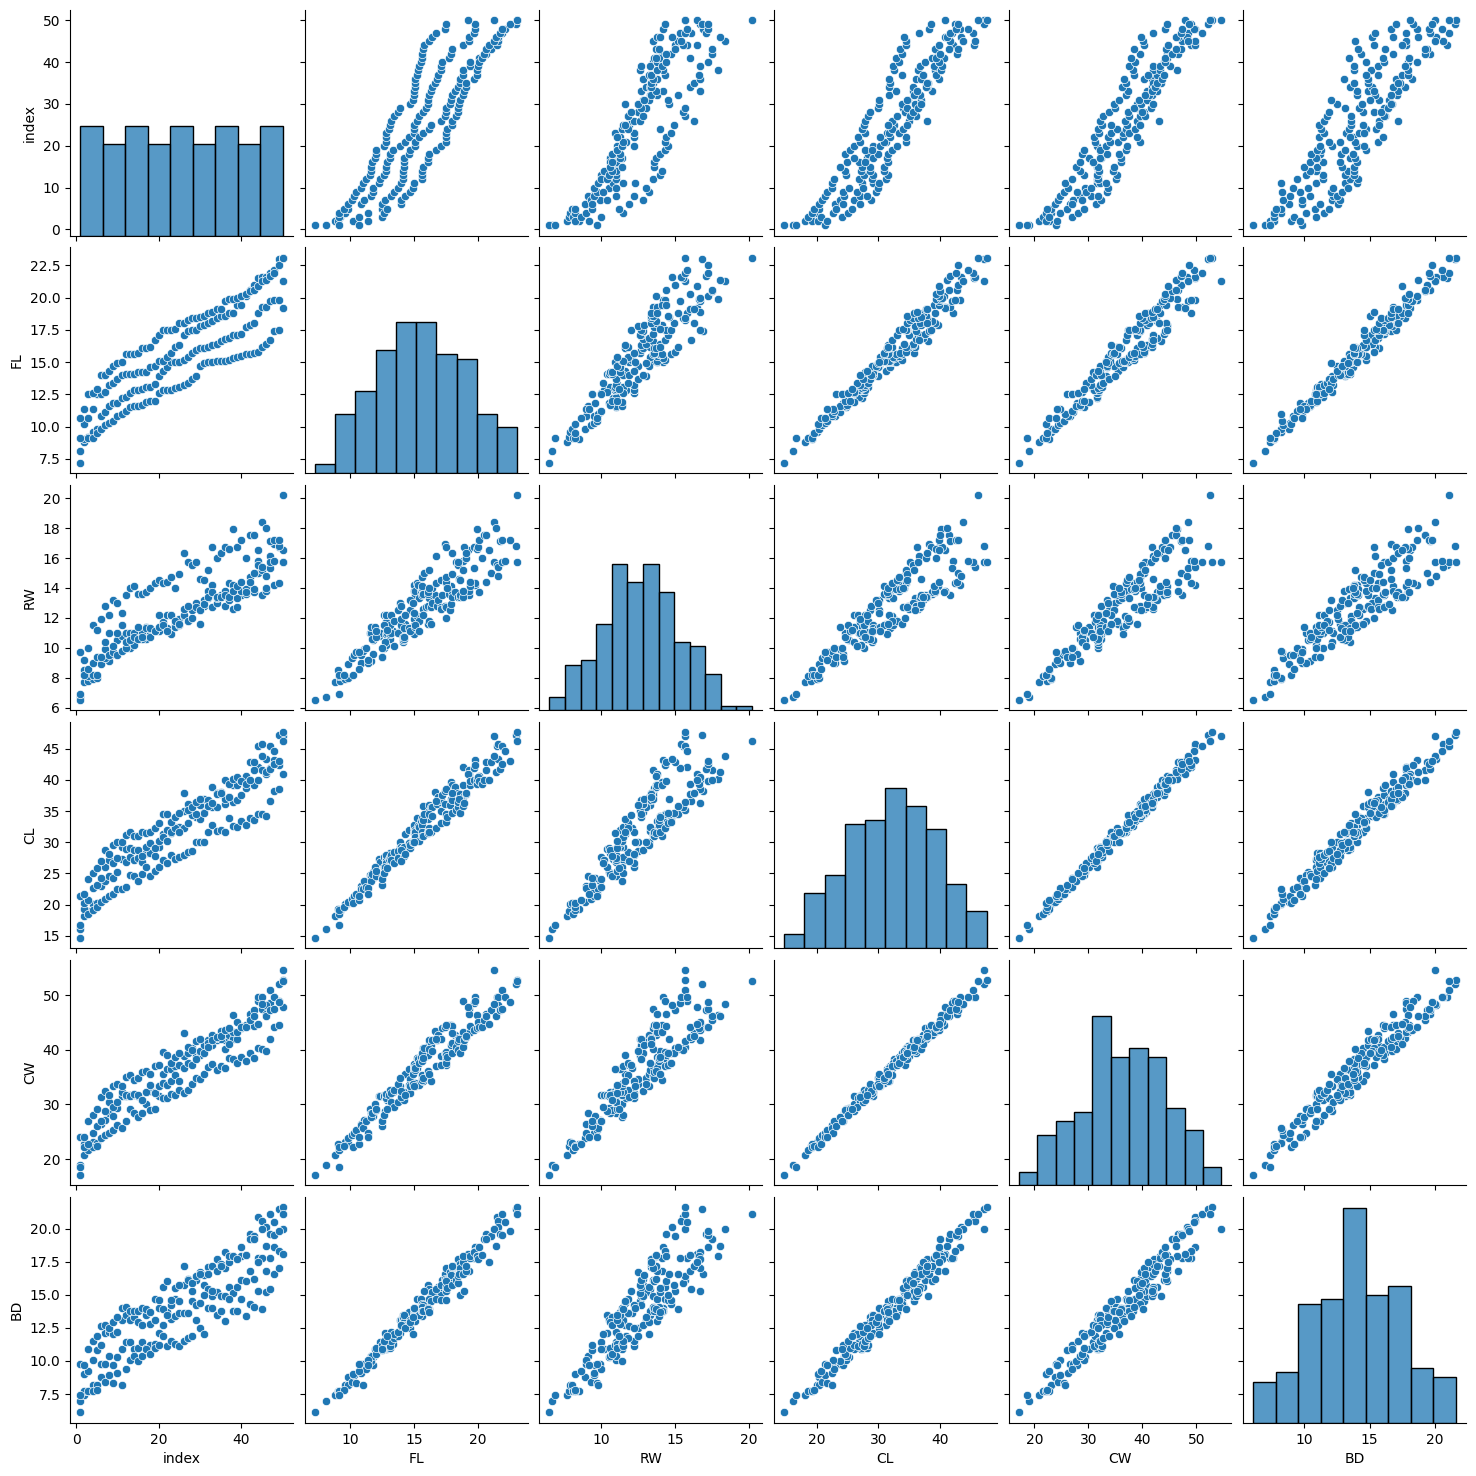

In [4]:
sns.pairplot(data)

<Axes: >

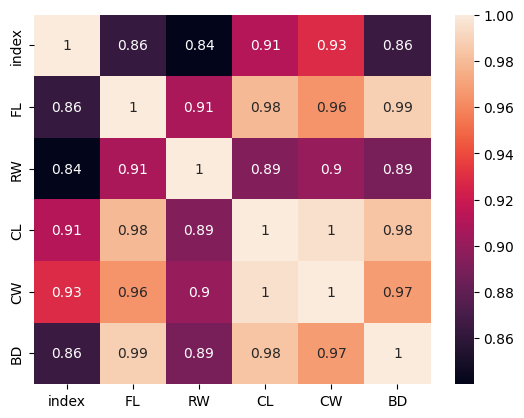

In [5]:
sns.heatmap(correlation, annot = True)
# Biểu thị bảng dưới màu sắc

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='CW', ylabel='CL'>

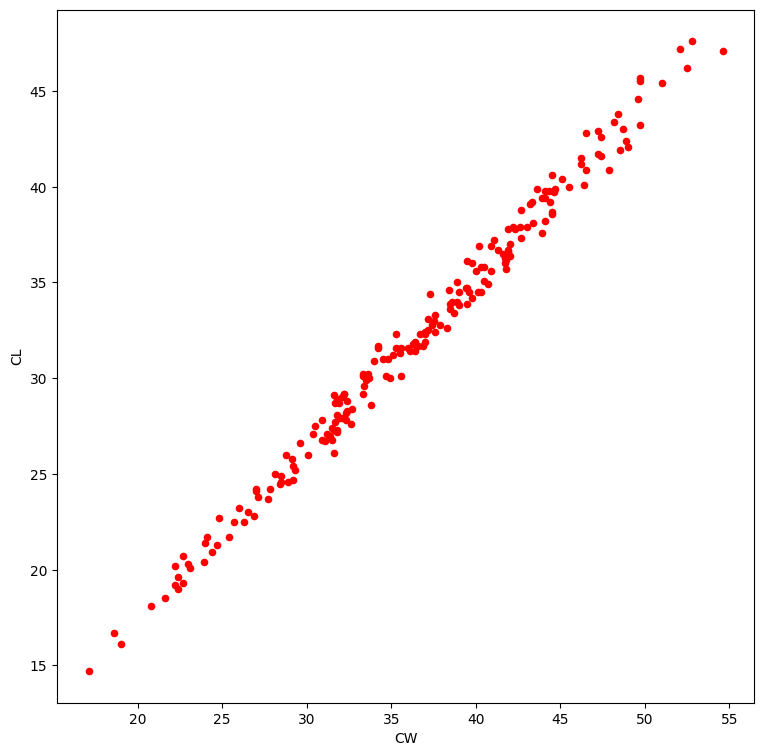

In [6]:
## CW & CL -> 0.995 (in corr)
data.plot(kind = 'scatter', x = 'CW', y = 'CL', figsize = (9,9),color = 'red')

In [7]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X = pd.DataFrame(data['CW']), y = data['CL']) 
print('Giá trị Interce: ',model.intercept_)
print('Giá trị Coeffient: ',model.coef_)
print('Độ chính xác của mô hình:', model.score(X= pd.DataFrame(data['CW']), y = data['CL']))

Giá trị Interce:  -0.6619479443406746
Giá trị Coeffient:  [0.89984616]
Độ chính xác của mô hình: 0.9900698671905853


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


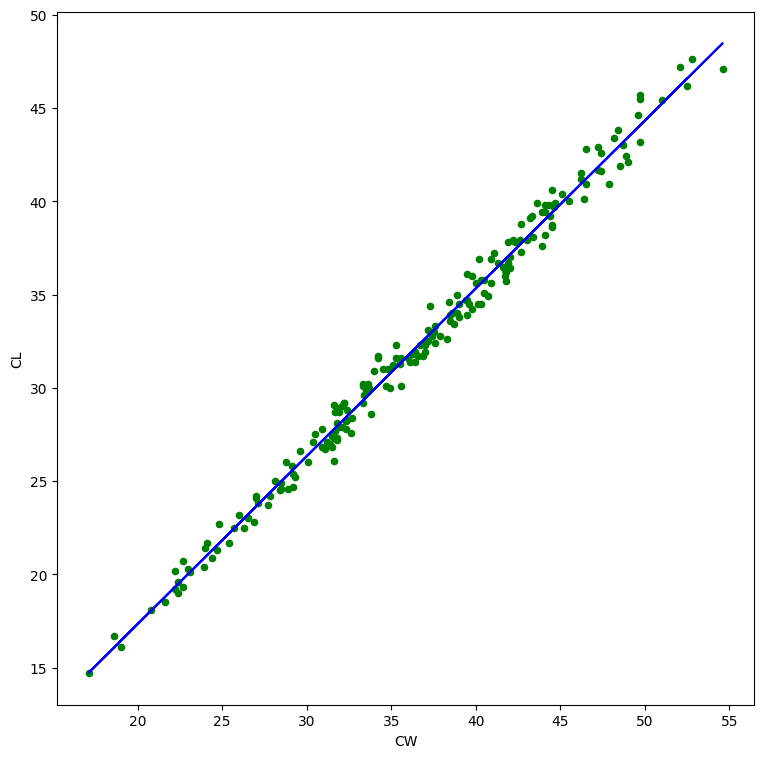

In [8]:
data.plot(kind = 'scatter', x = 'CW', y = 'CL', figsize = (9,9), color = 'green')
y_pred = model.predict(X = pd.DataFrame(data['CW']))  #pred: Mũ
plt.plot(data['CW'], y_pred, color = 'blue')

In [9]:
model = linear_model.LinearRegression()
X = pd.DataFrame([data['CW'],data['CW']**2,data['CW']**3,data['CW']**4,data['CW']**5,
                  data['CW']**6,data['CW']**7,data['CW']**8,data['CW']**9,data['CW']**10,
                  data['CW']**11]).T
model.fit(X, y = data['CL'])
print('Hệ số Intercept:', model.intercept_)
print('Hệ số Coeffient:', model.coef_)
print('Độ chính xác của mô hình:', model.score(X, y = data['CL']))

Hệ số Intercept: 11.74968396147812
Hệ số Coeffient: [ 2.38207284e-10 -4.51780758e-09  1.02981583e-07  1.16153852e-06
  7.14293248e-06 -2.08384438e-07 -1.90852231e-08  1.31095342e-09
 -3.27377742e-11  3.79336570e-13 -1.71069193e-15]
Độ chính xác của mô hình: 0.9903114541204591


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


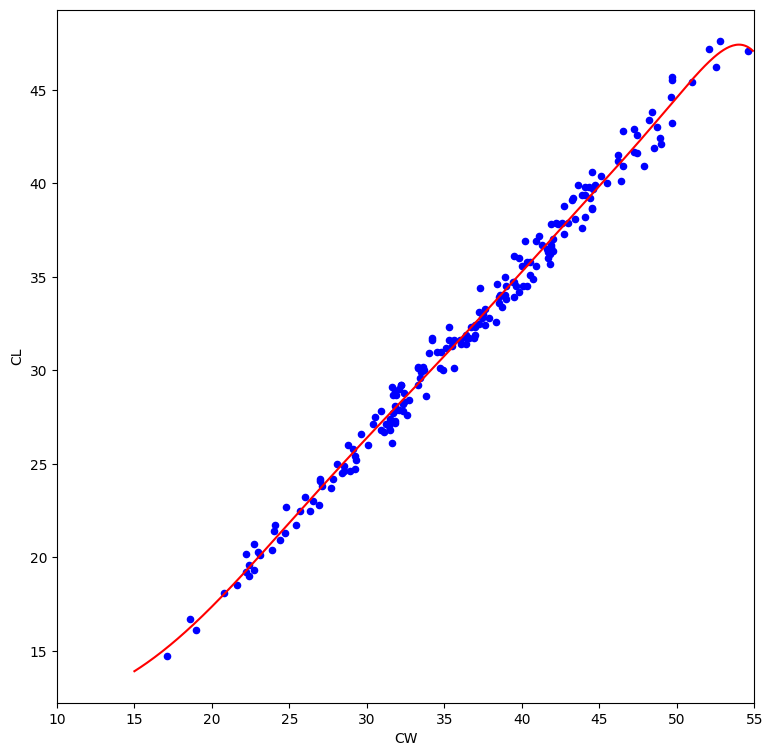

In [10]:
range = np.arange(15, 55, 0.1)
X_range = pd.DataFrame([range,range**2,range**3,range**4,range**5,
                        range**6,range**7,range**8,range**9,range**10,
                        range**11]).T
y_pred = model.predict(X_range)
data.plot(kind = 'scatter', x = 'CW', y = 'CL', figsize = (9,9), color = 'blue', xlim = (10, 55))
plt.plot(range, y_pred, color = 'red')

In [11]:
model = linear_model.LinearRegression()
model.fit(X = data.loc[:,['index','FL','RW','CW','BD']], y = data['CL'])
print('Hệ số Intercept:', model.intercept_)
print('Hệ số Coeffient:', model.coef_)
print('Độ chính xác của mô hình:', model.score(X = data.loc[:,['index','FL','RW','CW','BD']], y = data['CL']))

Hệ số Intercept: 0.3234215116691743
Hệ số Coeffient: [ 1.78537425e-04  2.65103364e-01 -1.78005493e-01  6.39753717e-01
  4.71660405e-01]
Độ chính xác của mô hình: 0.9972880914007611
